In [42]:
import pandas as pd
import pygmt
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
geo_df=pd.read_csv('../geological_map/ca_station_geology.csv')
geo_df.head(5)

,netst,stla,stlo,geometry,index_right,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,...,INDETERMIN,REF_ID,REFERENCE,GENERALIZE,DIGITAL_UR,NGMDB1,NGMDB2,NGMDB3,RuleID,FIPS_C
0,CI.ALP,34.687080,-118.299461,POINT (-118.299461 34.68708),4810,CA,Q,Q;0,CAQ;0,Quaternary alluvium and marine deposits,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Unconsolidated, undifferentiated",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,29,6
1,CI.ARV,35.126900,-118.830093,POINT (-118.830093 35.1269),2786,CA,M,MI;0,CAMI;0,Miocene marine rocks,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Sedimentary, clastic",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,23,6
2,CI.BAI,34.776951,-118.773354,POINT (-118.773354 34.776951),2829,CA,M,MI;0,CAMI;0,Miocene marine rocks,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Sedimentary, clastic",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,23,6
3,CI.BAK,35.344440,-119.104446,POINT (-119.104446 35.34444),4830,CA,Q,Q;0,CAQ;0,Quaternary alluvium and marine deposits,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Unconsolidated, undifferentiated",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,29,6
4,CI.BBR,34.262299,-116.920753,POINT (-116.920753 34.262299),4848,CA,Q,Q;0,CAQ;0,Quaternary alluvium and marine deposits,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Unconsolidated, undifferentiated",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,29,6


In [44]:
geo_df=geo_in[['netst',
               'stlo',
               'stla',
               'STATE',
               'GENERALIZE',
               'MAJOR1']]

In [45]:
fn1='sta_CI_vs30.csv'
pd_pnwbb = pd.read_csv(fn1)

In [46]:
# Merging pd1 with pd2 on the 'netst' column
merged_geo = pd_pnwbb.merge(geo_df, on='netst', how='left')


# Display the merged DataFrame
merged_geo.to_csv('merged_geo.csv', index=False)

In [47]:
merged_geo.head(5)

,Unnamed: 0,fband,netst,stlo_x,stla_x,meanb,meanQ,ncount,nearest_lon,nearest_lat,vs30,stlo_y,stla_y,STATE,GENERALIZE,MAJOR1
0,0,0.5-1.0,CI.ALP,-118.299461,34.687080,0.36,13.090,1,-118.2995,34.6876,346.6100,-118.299461,34.687080,CA,"Unconsolidated, undifferentiated",Coarse-detrital
1,1,0.5-1.0,CI.ARV,-118.830093,35.126900,0.07,67.320,1,-118.8294,35.1276,350.1552,-118.830093,35.126900,CA,"Sedimentary, clastic",Sandstone
2,2,0.5-1.0,CI.BBR,-116.920753,34.262299,0.13,36.249,1,-116.9215,34.2616,355.0690,-116.920753,34.262299,CA,"Unconsolidated, undifferentiated",Coarse-detrital
3,3,0.5-1.0,CI.BBS,-116.980583,33.921391,0.01,471.239,1,-116.9815,33.9216,341.0904,-116.980583,33.921391,CA,"Unconsolidated, undifferentiated",Coarse-detrital
4,4,0.5-1.0,CI.BCW,-119.413132,34.940090,0.11,42.840,1,-119.4134,34.9396,359.1823,-119.413132,34.940090,CA,"Sedimentary, clastic",Sandstone


/tmp/ipykernel_522290/4185905778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENERALIZE'] = df['GENERALIZE'].astype(str)  # Ensure categorical variable
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


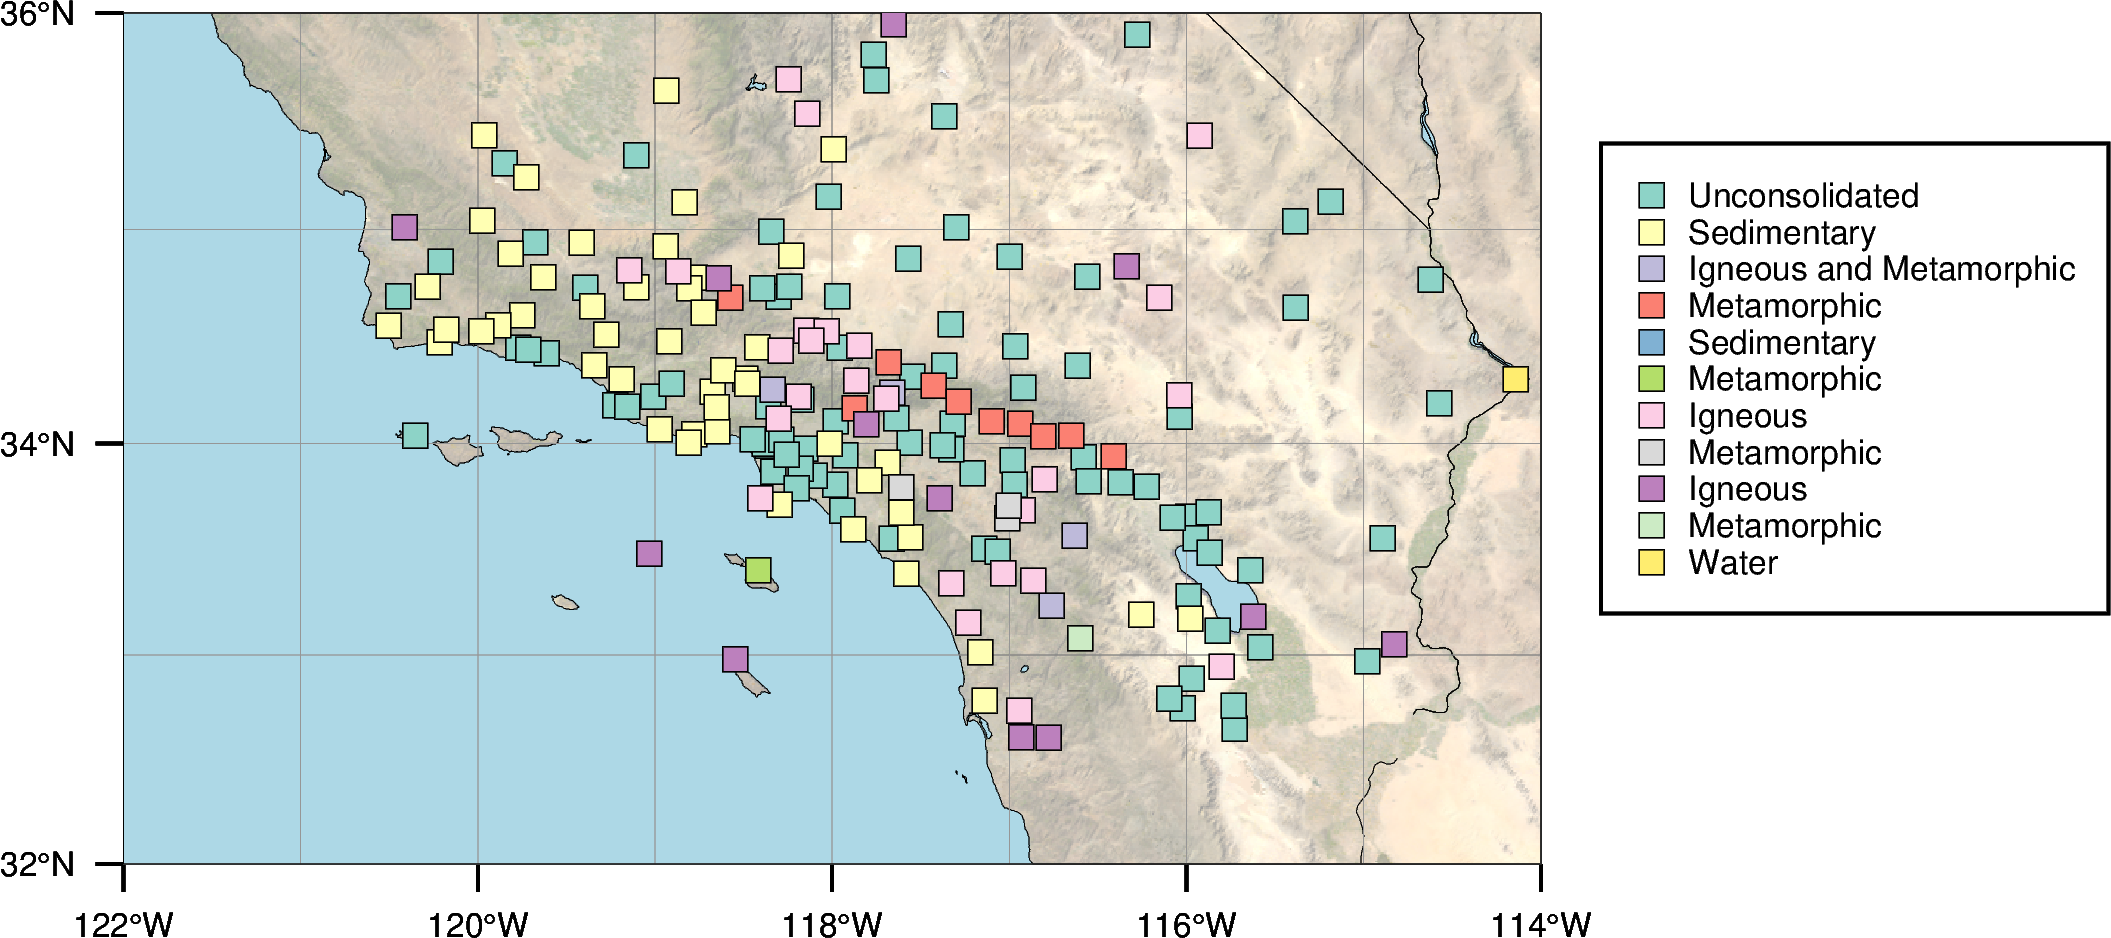

In [48]:


# Load CSV data
df = geo_df
df['GENERALIZE'] = df['GENERALIZE'].astype(str)  # Ensure categorical variable


region=[-122,-114,32,36]
proj='M6c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a2g1", )
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )

fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
# Plot each unique NA_L3KEY as a different color
unique_keys = df['GENERALIZE'].unique()

# Get colormap
cmap = plt.get_cmap('Set3', len(unique_keys))
# Plot each unique NA_L3NAME with corresponding color from the colormap
for i, key in enumerate(unique_keys):
    subset = df[df['GENERALIZE'] == key]
    
    # Check if subset is not empty
    if not subset.empty and len(subset) > 0:
        color = to_hex(cmap(i)[:3])  # Get the color from the colormap
        # print(f"Plotting {key} with color {color}")
        # Plot with the same length for x and y
        fig.plot(
            x=subset['stlo'],
            y=subset['stla'],
            style="s0.15c",  # Circle style with size
            pen="0.1p,black",
            fill=color,  # Use RGB values; color is returned as (R, G, B, A)
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR+o0.1i", box="+gwhite+p0.4p")
fig.show(dpi=600)


In [49]:
geo_filtered = merged_geo[merged_geo['MAJOR1'].map(merged_geo['MAJOR1'].value_counts()) > 3]

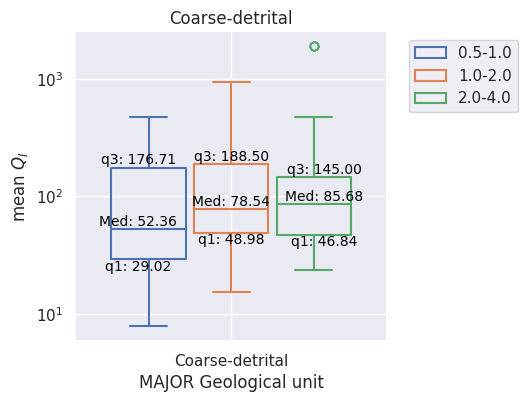

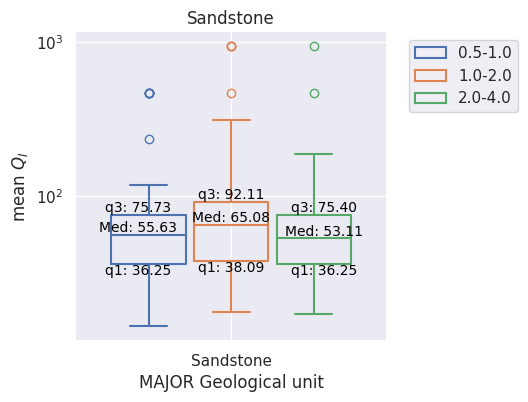

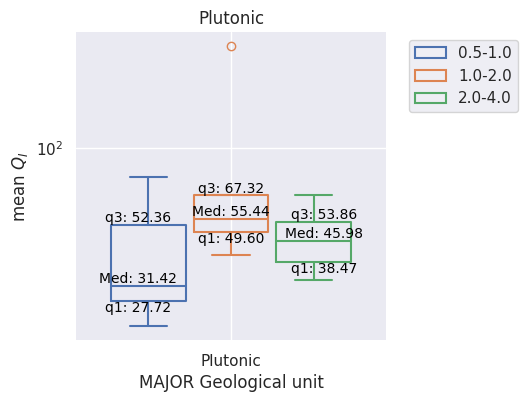

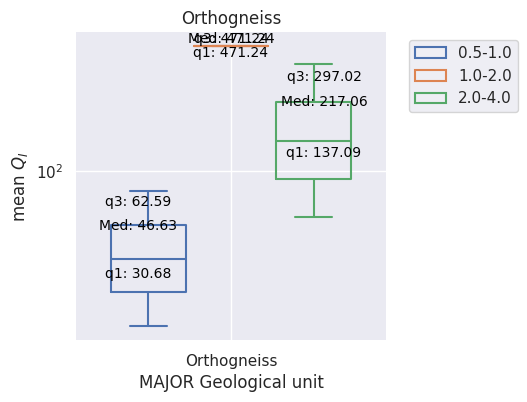

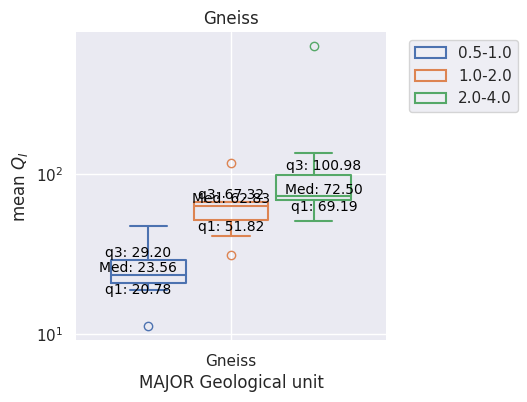

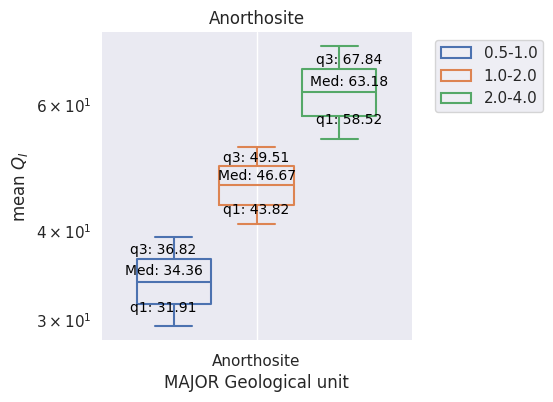

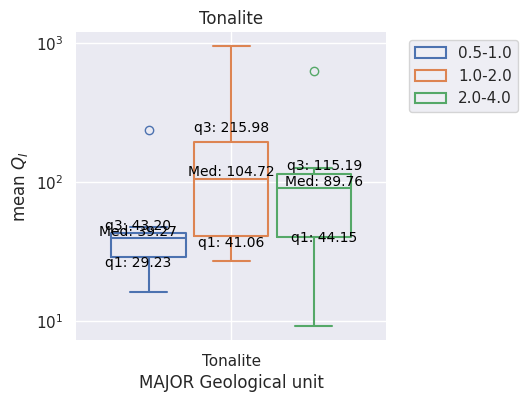

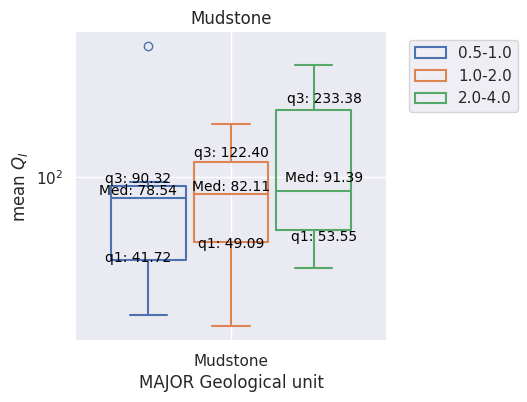

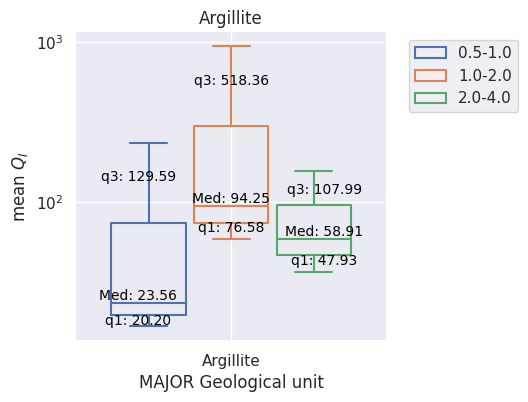

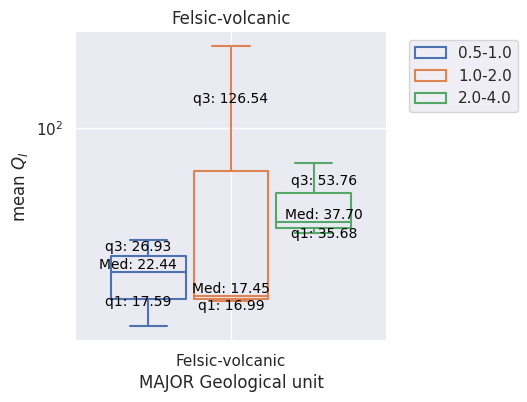

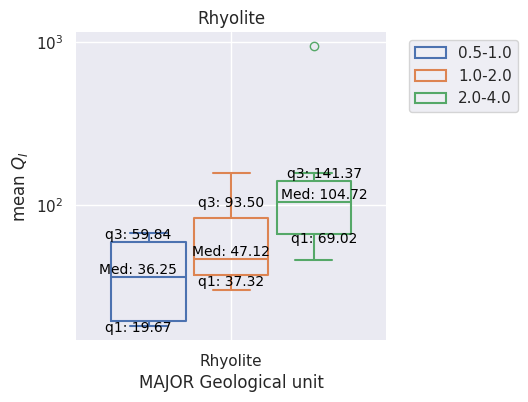

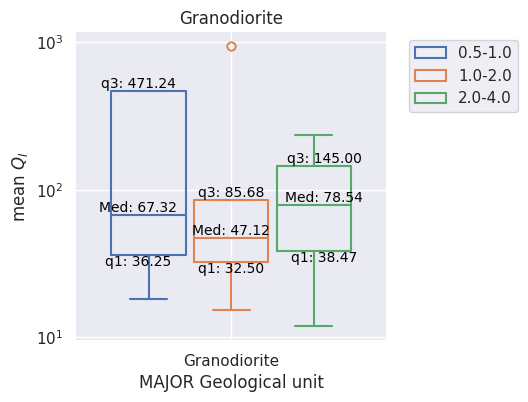

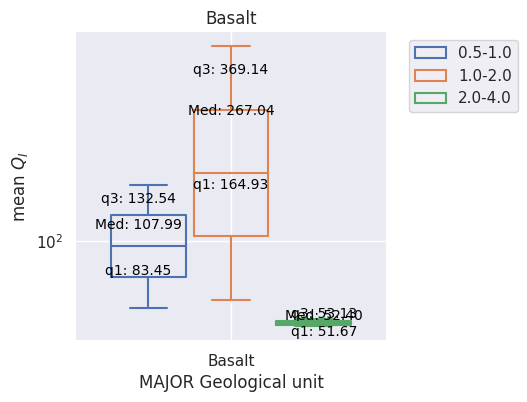

In [50]:
sns.set_theme()
for rock in geo_filtered['MAJOR1'].unique():
    data_geo = geo_filtered[geo_filtered['MAJOR1'] == rock]
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4,4))
    ax.set_yscale("log")
    sns.boxplot(data=data_geo, y="meanQ", x="MAJOR1", hue="fband", gap=0.1,
                 fill=False,
                )
    # sns.stripplot(data_geo, x="GENERALIZE", y="meanQ", hue="fband", size=2,)
    # sns.violinplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", fill=False,)
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        med = data_in['meanQ'].median()
        q1 = data_in['meanQ'].quantile(0.25)
        q3 = data_in['meanQ'].quantile(0.75)
        
        # Get the position on the x-axis for the current category
        xpos = n*0.3-0.3
        
        # Plot the mean and quartiles as text on the plot
        ax.text(xpos, med, f'Med: {med:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(xpos, q1, f'q1: {q1:.2f}', ha='center', va='top', color='black', fontsize=10)
        ax.text(xpos, q3, f'q3: {q3:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set(ylabel="mean $Q_I$", xlabel="MAJOR Geological unit", title=f'{rock}')
    sns.despine(trim=True, left=True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
    # plt.gcf().set_dpi(300)
    plt.show()


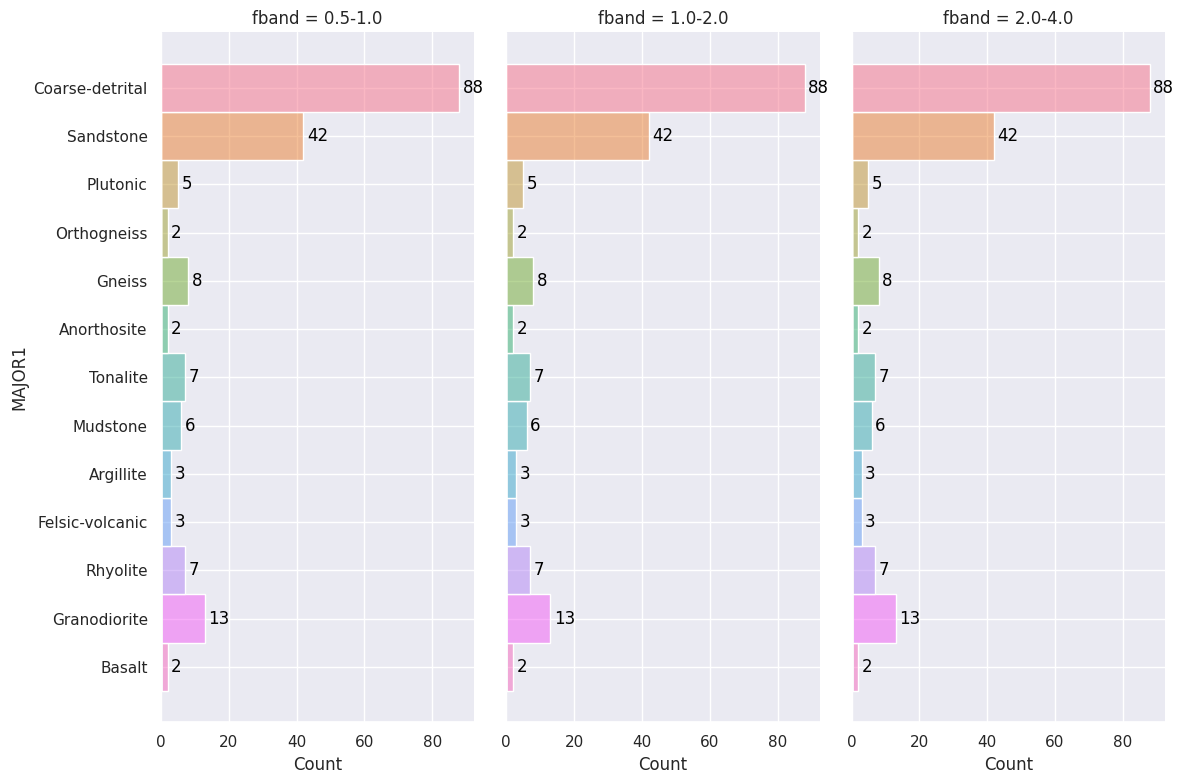

In [51]:
sns.set_theme()

g= sns.displot(
    geo_filtered, y="MAJOR1", hue="MAJOR1", col="fband", bins=1,
    binwidth=3, height=8, facet_kws=dict(margin_titles=True),legend=False,
    aspect=0.5, palette="husl"
)
original_order = geo_filtered['MAJOR1'].unique()
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['MAJOR1'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 1, i, f'{int(count)}', color='black', ha='left', va='center')
plt.tight_layout()


/tmp/ipykernel_522290/1095890512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_filtered['MAJOR1'] = pd.Categorical(geo_filtered['MAJOR1'], categories=original_order, ordered=True)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Coarse-detrital with color #1f77b4
Plotting Sandstone with color #aec7e8
Plotting Plutonic with color #ffbb78
Plotting Orthogneiss with color #98df8a
Plotting Gneiss with color #d62728
Plotting Anorthosite with color #9467bd
Plotting Tonalite with color #8c564b
Plotting Mudstone with color #c49c94
Plotting Argillite with color #f7b6d2
Plotting Felsic-volcanic with color #c7c7c7
Plotting Rhyolite with color #bcbd22
Plotting Granodiorite with color #17becf
Plotting Basalt with color #9edae5


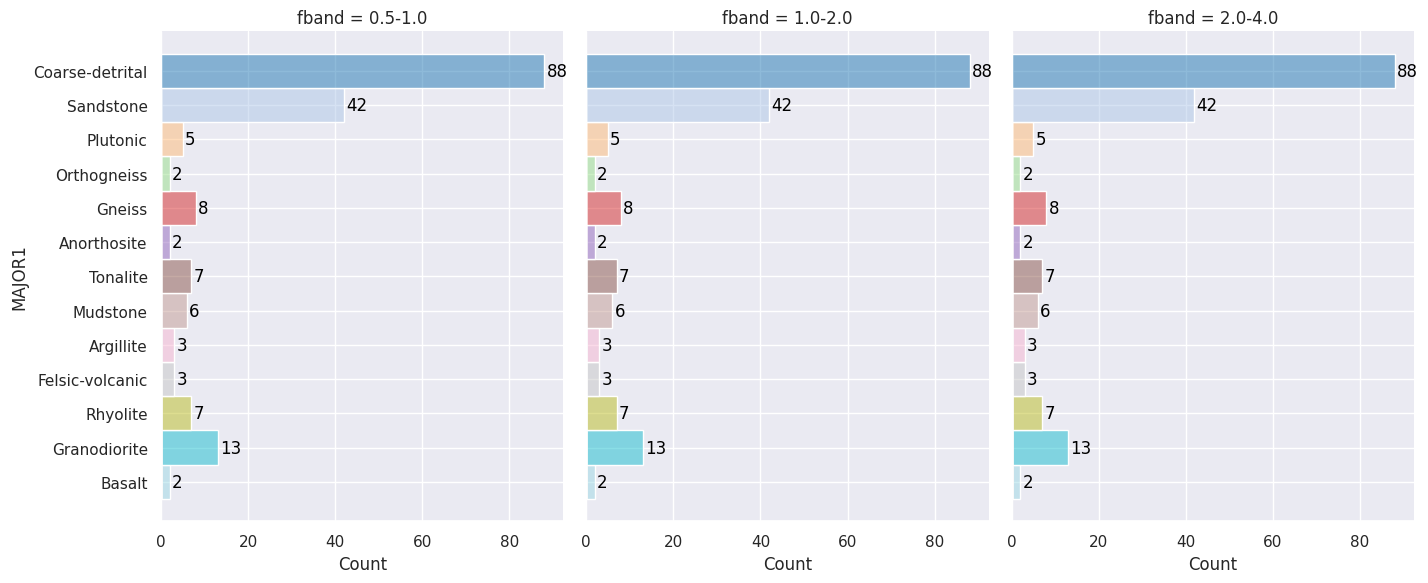

In [52]:
# Step 1: Ensure 'GENERALIZE' is in its original order
original_order = geo_filtered['MAJOR1'].unique()
geo_filtered['MAJOR1'] = pd.Categorical(geo_filtered['MAJOR1'], categories=original_order, ordered=True)

# Step 2: Create a fixed color map dictionary based on the original order using a consistent color palette
cmap = plt.get_cmap('tab20', len(original_order))
color_map = {category: to_hex(cmap(i)[:3]) for i, category in enumerate(original_order)}

# Step 3: Plotting with Seaborn using the fixed color map
import seaborn as sns
g = sns.displot(
    geo_filtered, y="MAJOR1", hue="MAJOR1", col="fband", bins=1,
    binwidth=3, height=6, facet_kws=dict(margin_titles=True), legend=False,
    aspect=0.8, palette=color_map  # Use the fixed color map here
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['MAJOR1'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 0.5, i, f'{int(count)}', color='black', ha='left', va='center')
        
# Step 4: Now plot the map with PyGMT using the same color mapping

proj = 'M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN='0.01p,150', MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p')

# Plot the basemap
fig.basemap(region=region, projection=proj, frame="a2g1")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
# Add coastlines and water
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p", water='lightblue', shorelines='0/0.1p')

# Plot each unique GENERALIZE category using the color map dictionary
for key in original_order:
    subset = geo_filtered[geo_filtered['MAJOR1'] == key]
    
    # Check if subset is not empty
    if not subset.empty:
        color = color_map[key]  # Use the fixed color for the category
        print(f"Plotting {key} with color {color}")
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Square style with size
            pen="0.1p,black",
            fill=color,
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
fig.savefig(fname='GEOunitmap_histo.png' , dpi=600)
plt.savefig(fname='GEOunit_histo.png' , dpi=600)

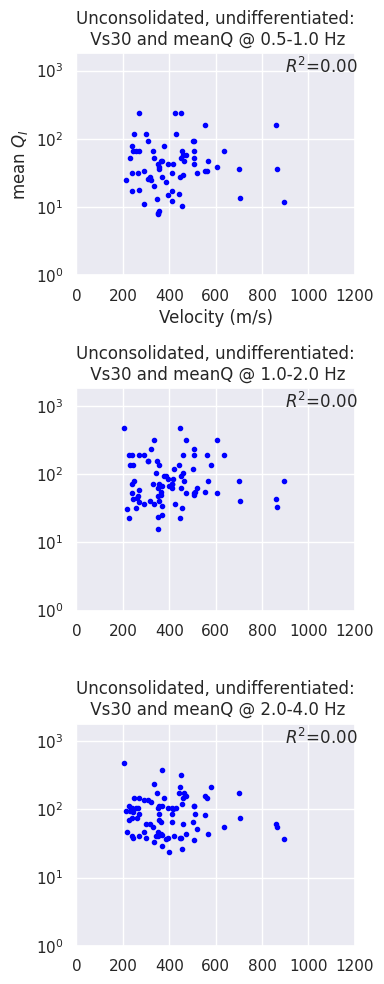

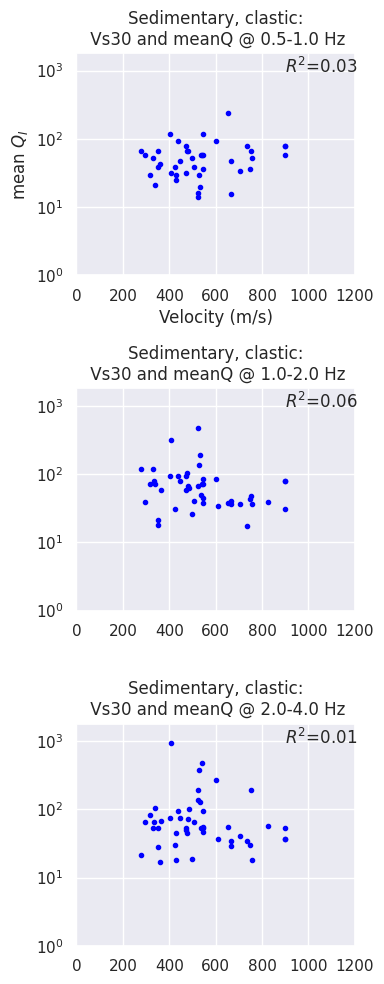

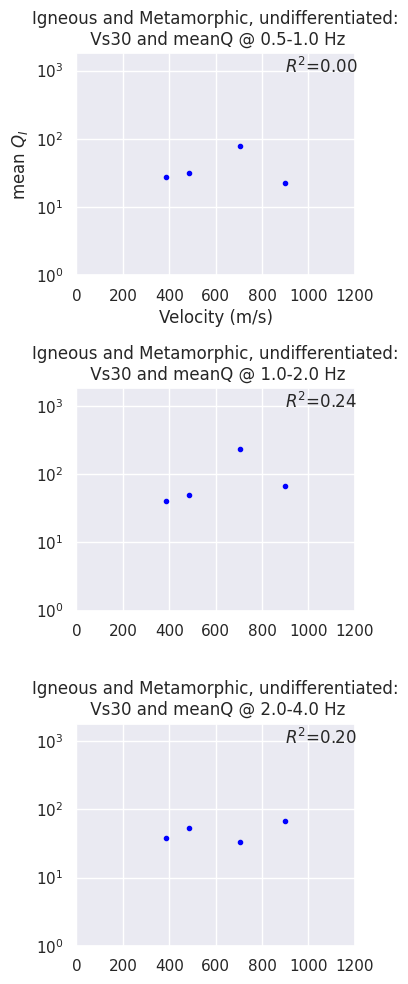

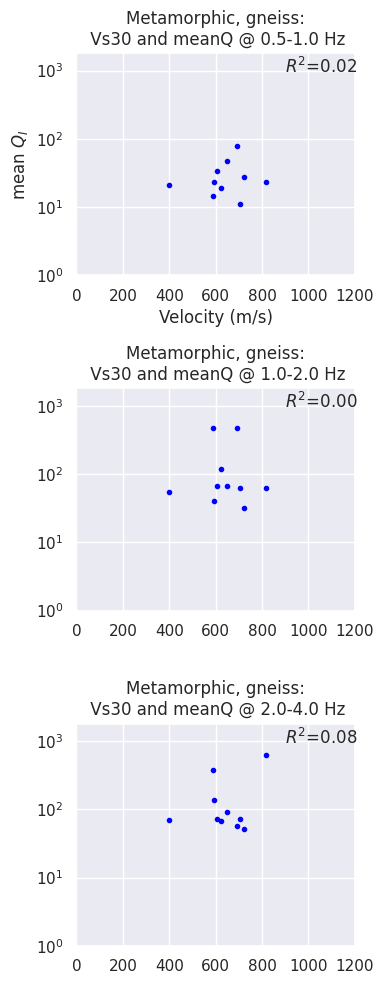

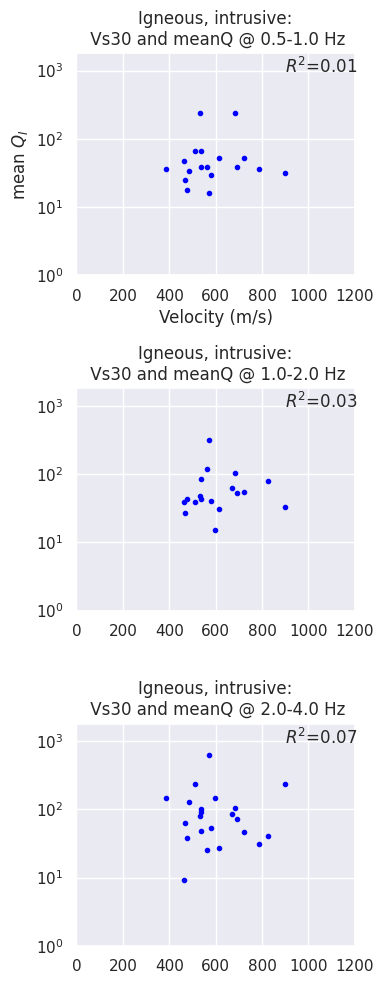

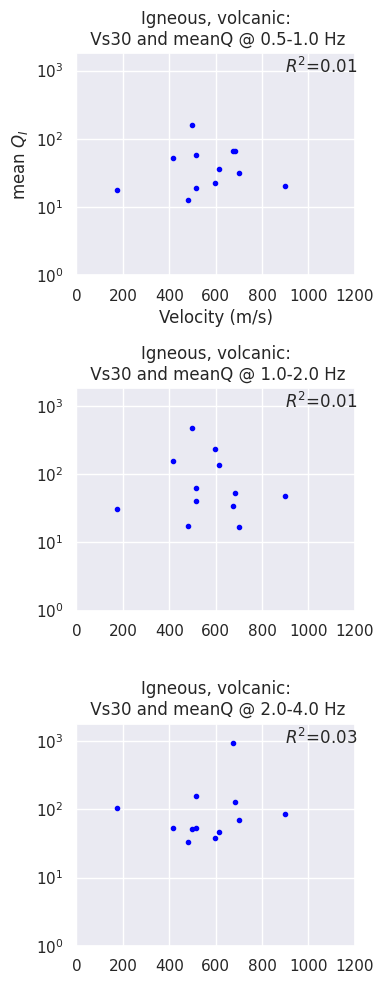

In [53]:


for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    data_geo = data_geo[(data_geo['GENERALIZE']== rock) & (data_geo['meanb'] > 0.01)]
    if len(data_geo) < 12:
        continue
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(3,1,figsize=(4,10))

    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        
        ax[n].set_yscale("log")
        ax[n].set_ylim(1,1800)
        ax[n].set_xlim(0,1200)
        
        ax[n].set_title(f'{rock}:\n Vs30 and meanQ @ {fb} Hz')        
        ax[n].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color='blue')        

        R0=np.corrcoef(data_in['vs30'],np.log(data_in['meanQ']))[0,1]
        ax[n].text(0.75,0.91,f'$R^2$={R0**2:.2f}',transform=ax[n].transAxes)
 

    ax[0].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    plt.tight_layout()
    
    


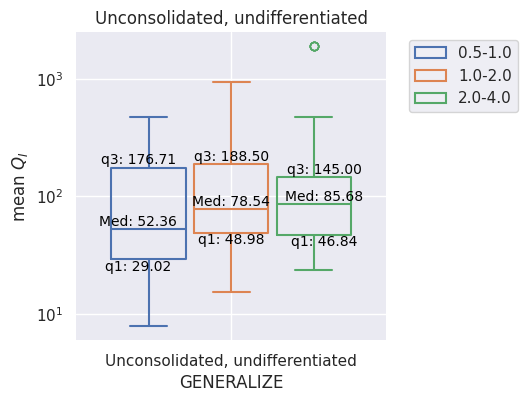

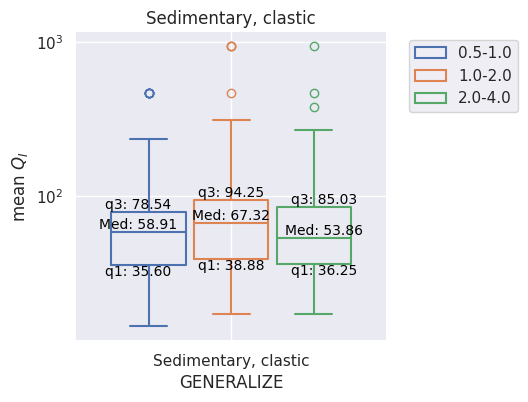

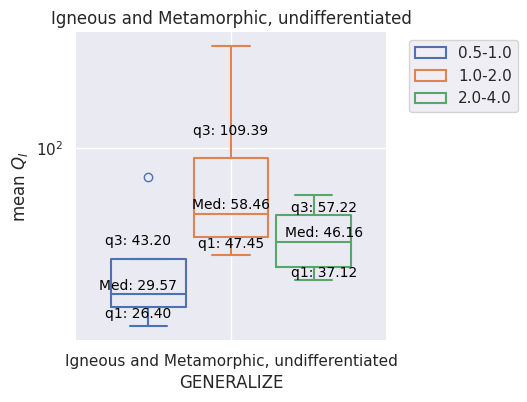

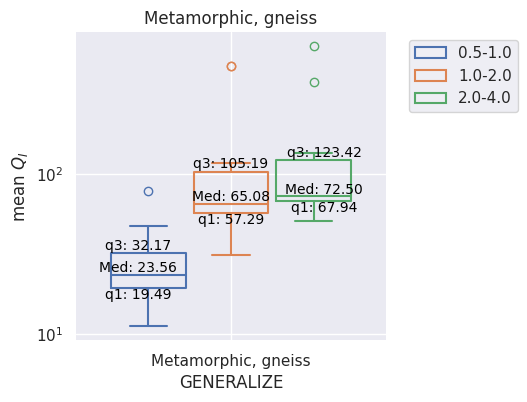

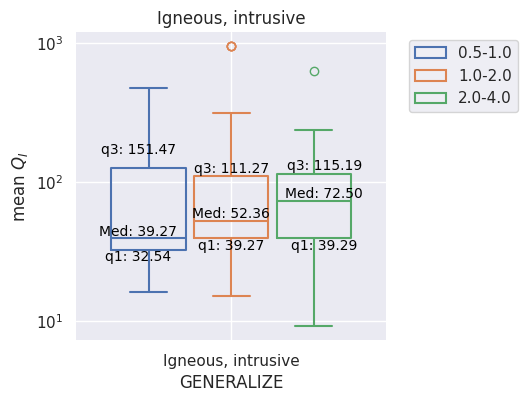

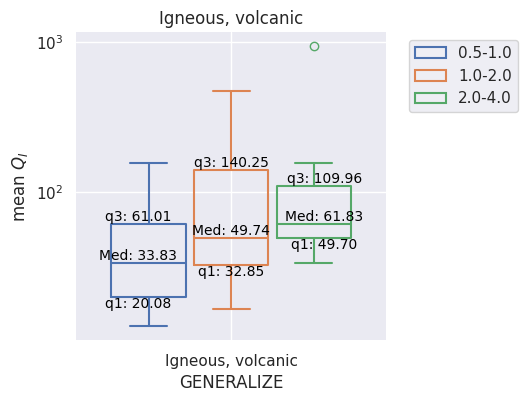

In [54]:
sns.set_theme()
for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    if len(data_geo) < 12:
        continue
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4,4))
    ax.set_yscale("log")
    sns.boxplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", gap=0.1,
                 fill=False,
                )
    # sns.stripplot(data_geo, x="GENERALIZE", y="meanQ", hue="fband", size=2,)
    # sns.violinplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", fill=False,)
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        med = data_in['meanQ'].median()
        q1 = data_in['meanQ'].quantile(0.25)
        q3 = data_in['meanQ'].quantile(0.75)
        
        # Get the position on the x-axis for the current category
        xpos = n*0.3-0.3
        
        # Plot the mean and quartiles as text on the plot
        ax.text(xpos, med, f'Med: {med:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(xpos, q1, f'q1: {q1:.2f}', ha='center', va='top', color='black', fontsize=10)
        ax.text(xpos, q3, f'q3: {q3:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set(ylabel="mean $Q_I$", xlabel="GENERALIZE", title=f'{rock}')
    sns.despine(trim=True, left=True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
    # plt.gcf().set_dpi(300)
    plt.show()


In [55]:
print(geo_filtered['MAJOR1'].unique().tolist())

['Coarse-detrital', 'Sandstone', 'Plutonic', 'Orthogneiss', 'Gneiss', 'Anorthosite', 'Tonalite', 'Mudstone', 'Argillite', 'Felsic-volcanic', 'Rhyolite', 'Granodiorite', 'Basalt']


Coarse-detrital 0.5-1.0 69
Coarse-detrital 1.0-2.0 80
Coarse-detrital 2.0-4.0 82
Sandstone 0.5-1.0 37
Sandstone 1.0-2.0 39
Sandstone 2.0-4.0 42


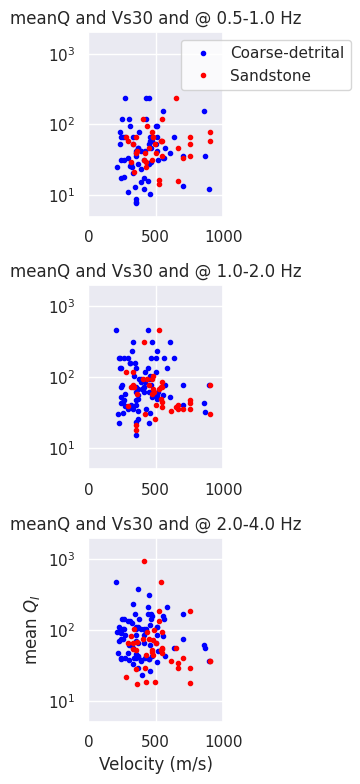

In [63]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(3,1,figsize=(6,8))

selected_rock = ['Coarse-detrital', 'Sandstone',]
colors=['blue','red','black','orange','lightgreen']

for ktype, rock in enumerate(selected_rock):
    data_geo = geo_filtered[geo_filtered['MAJOR1'] == rock]
    data_geo = data_geo[(data_geo['MAJOR1']== rock) & (data_geo['meanb'] > 0.01)]
    if len(data_geo) < 12:
        continue
    color=colors[ktype]
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        print(rock, fb, len(data_in))
        
        ax[n].set_yscale("log")
        ax[n].set_ylim(5,2000)
        ax[n].set_xlim(0,1000)

        ax[n].set_title(f'meanQ and Vs30 and @ {fb} Hz')
        
        ax[n].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color=color)
        plt.tight_layout()
    ax[2].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    ax[0].legend(selected_rock, loc='upper right', bbox_to_anchor =(2, 1) ).get_frame().set_facecolor('white')
    

plt.show()



/tmp/ipykernel_522290/909025918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_filtered['GENERALIZE'] = pd.Categorical(geo_filtered['GENERALIZE'], categories=original_order, ordered=True)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Unconsolidated, undifferentiated with color #1f77b4
Plotting Sedimentary, clastic with color #ff7f0e
Plotting Igneous and Metamorphic, undifferentiated with color #d62728
Plotting Metamorphic, gneiss with color #8c564b
Plotting Igneous, intrusive with color #e377c2
Plotting Metamorphic, sedimentary clastic with color #bcbd22
Plotting Igneous, volcanic with color #17becf


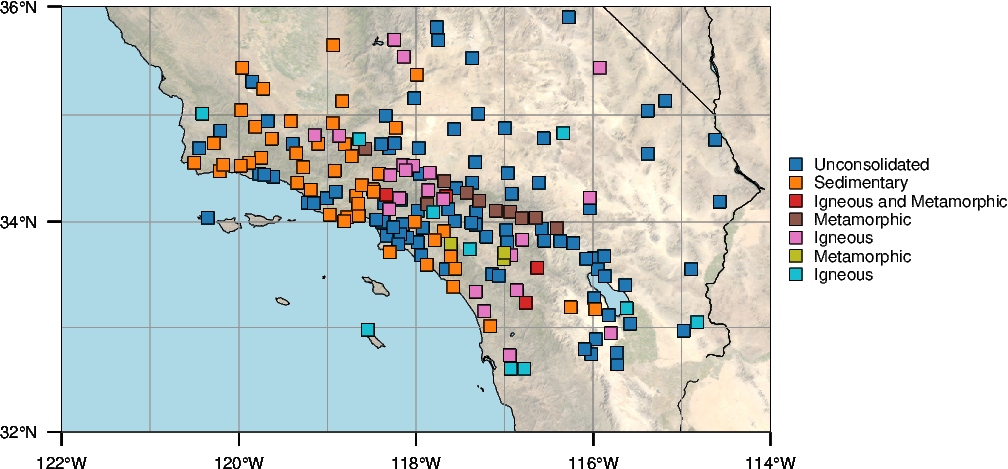

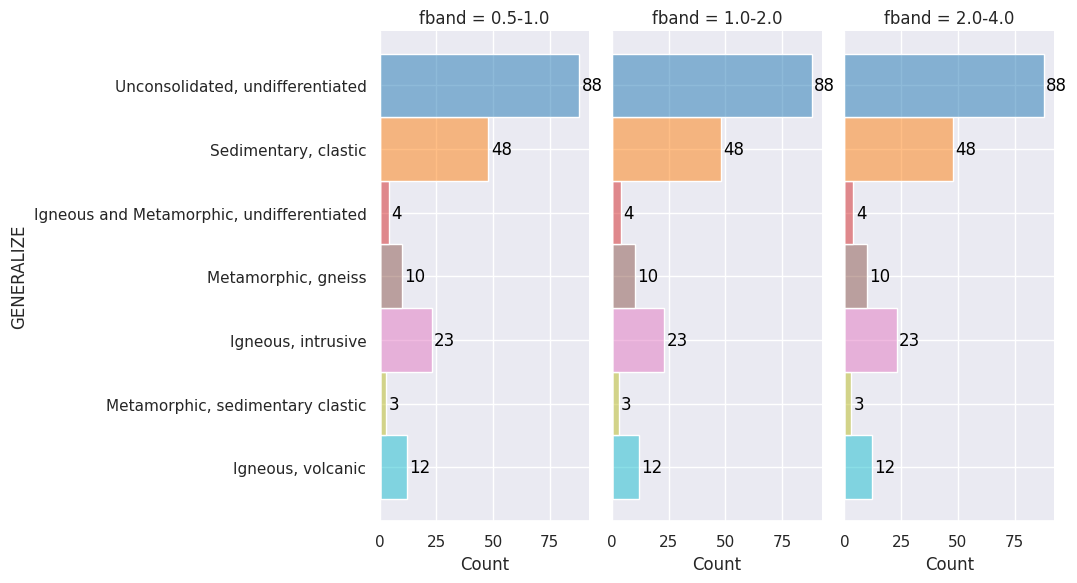

In [58]:
# Step 1: Ensure 'GENERALIZE' is in its original order
original_order = geo_filtered['GENERALIZE'].unique()
geo_filtered['GENERALIZE'] = pd.Categorical(geo_filtered['GENERALIZE'], categories=original_order, ordered=True)

# Step 2: Create a fixed color map dictionary based on the original order using a consistent color palette
cmap = plt.get_cmap('tab10', len(original_order))
color_map = {category: to_hex(cmap(i)[:3]) for i, category in enumerate(original_order)}

# Step 3: Plotting with Seaborn using the fixed color map
g = sns.displot(
    geo_filtered, y="GENERALIZE", hue="GENERALIZE", col="fband", bins=1,
    binwidth=3, height=6, facet_kws=dict(margin_titles=True), legend=False,
    aspect=0.6, palette=color_map  # Use the fixed color map here
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['GENERALIZE'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 1, i, f'{int(count)}', color='black', ha='left', va='center')
        
# Step 4: Now plot the map with PyGMT using the same color mapping

proj = 'M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN='0.01p,150', MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p')

# Plot the basemap
fig.basemap(region=region, projection=proj, frame="a2g1")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
# Add coastlines and water
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p", water='lightblue', shorelines='0/0.1p')

# Plot each unique GENERALIZE category using the color map dictionary
for key in original_order:
    subset = geo_filtered[geo_filtered['GENERALIZE'] == key]
    
    # Check if subset is not empty
    if not subset.empty:
        color = color_map[key]  # Use the fixed color for the category
        print(f"Plotting {key} with color {color}")
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Square style with size
            pen="0.1p,black",
            fill=color,
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
fig.show()
fig.savefig(fname='GEOgenermap_histo.png' , dpi=600)
plt.savefig(fname='GEOgener_histo.png' , dpi=600)